# Table of Contents
- [Read CVS from File](#Read-CVS-from-File)
- [Get column and row count](#Get-column-and-row-count)
- [Normalize Data](#Normalize-Data)
    - [Convert Dates](#Convert-Dates)
- [Save to CSV](#Save-to-CSV)
- [Convert CVS to Data Frames](#Convert-CVS-to-Data-Frames)
- [Write DataFrame to CSV file](#Write-DataFrame-to-CSV-file)
- [Read DataFrame from CSV file](#Read-DataFrame-from-CSV-file)

# Read CVS from File

In [1]:
include("MarketIndicators.jl")

df = fetch_data(file_path, date_format="yyyy-mm-dd" )
df = shift_dates_by_days!(df, shift_days=-1, date_column=1)
days_since_day_one(df, row, date_column) 
update_rata_die!(df, days_column=1, date_column=2)



In [8]:
df = fetch_data(file_initial_jobless_claims, "yyyy-mm-dd" )

,Date,ActualValue,ForecastValue,PreviousValue
,String,Int64,Int64⍰,Int64
1,2020.09.03,881,1059,1011
2,2020.08.27,1006,1039,1104
3,2020.08.20,1106,1078,971
4,2020.08.13,963,1316,1191
5,2020.08.06,1186,1435,1435
6,2020.07.30,1434,1368,1422
7,2020.07.23,1416,1315,1307
8,2020.07.16,1300,1379,1310
9,2020.07.09,1314,1200,1413


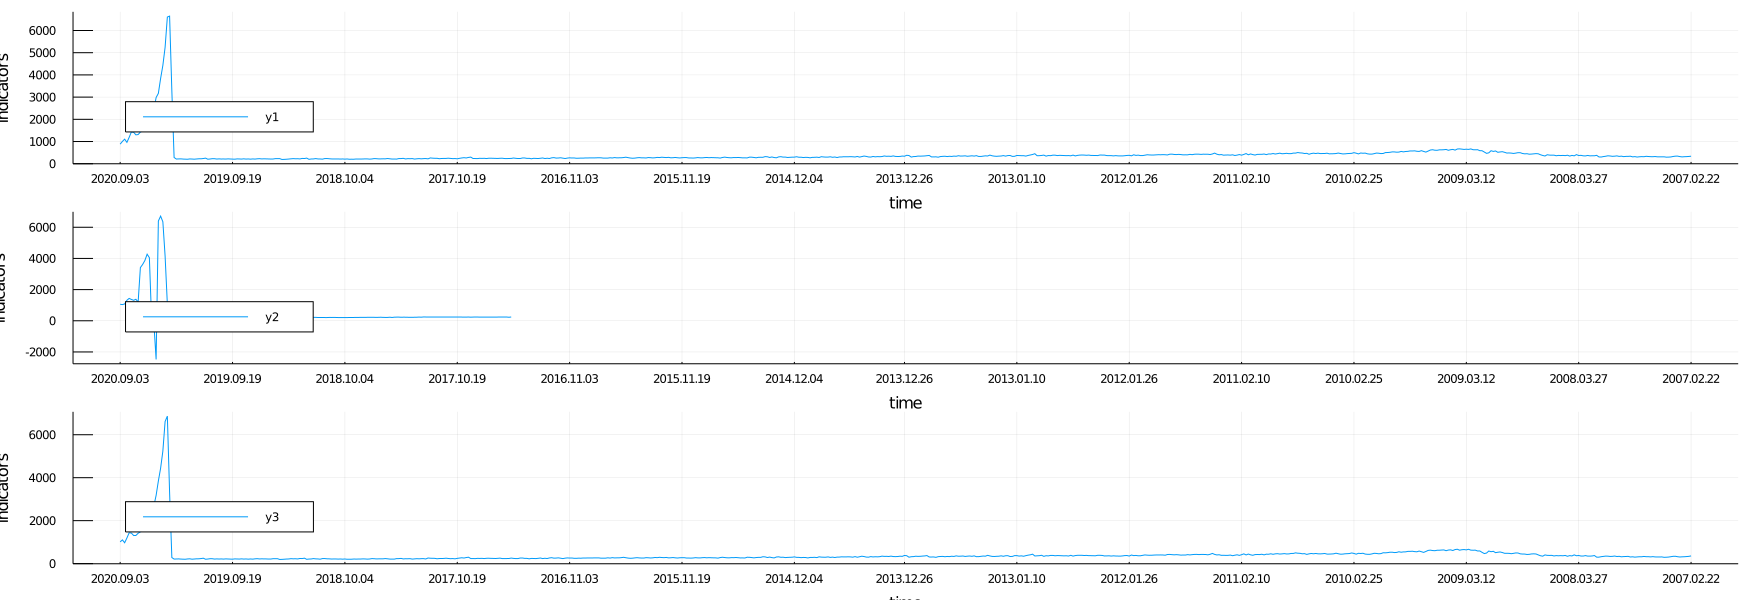

In [10]:
using Plots
gr()
plot(df[:,1], 
    [df[:,2]  df[:,3] df[:,4]  ], 
    #label    = ["original" "normalized"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1750, 600), # width, height
    layout = (3, 1)
    )

In [2]:
#rename!(df, :x1 => :Day)
#rename!(df, :x2 => :Date)
#rename!(df, :x3 => :IMS)
#rename!(df, :x4 => :GDP)

# Read DataFrame for Excel spreadsheet

In [ ]:
FileIO,ExcelFiles
df = readxl(DataFrame, “Filename.xlsx”, “Sheet1!A1:C4”) | From an Excel file

[back to top](#Table-of-Contents)
<hr/>

# Save to CSV

In [11]:
file_name = "ISM_vs_GDP_002.csv"

open(file_name, "w") do io
    writedlm(io, array_data, ',')
end;
array_data = readdlm(file_name, ',') # comma delimeted

864×4 Array{Any,2}:
     0  "1-Jan-1948"   51.7   0.062
    31  "1-Feb-1948"   50.2   0.062
    60  "1-Mar-1948"   43.3   0.062
    91  "1-Apr-1948"   45.4   0.068
   121  "1-May-1948"   49.5   0.068
   152  "1-Jun-1948"   53.0   0.068
   182  "1-Jul-1948"   48.4   0.023
   213  "1-Aug-1948"   45.1   0.023
   244  "1-Sep-1948"   42.1   0.023
   274  "1-Oct-1948"   47.2   0.004
   305  "1-Nov-1948"   42.4   0.004
   335  "1-Dec-1948"   35.0   0.004
   366  "1-Jan-1949"   32.9  -0.054
     ⋮                       
 26316  "19-Jan-2020"  56.6   0.031
 26347  "19-Feb-2020"  54.2   0.031
 26376  "19-Mar-2020"  55.3   0.031
 26407  "19-Apr-2020"  52.8   0.02
 26437  "19-May-2020"  52.1   0.02
 26468  "19-Jun-2020"  51.7   0.02
 26498  "19-Jul-2020"  51.2   0.021
 26529  "19-Aug-2020"  48.8   0.021
 26560  "19-Sep-2020"  48.2   0.021
 26590  "19-Oct-2020"  48.5   0.021
 26621  "19-Nov-2020"  48.1   0.021
 26651  "19-Dec-2020"  47.8   0.021

[back to top](#Table-of-Contents)
<hr/>

# Convert CVS to Data Frames

In [12]:
using CSV
using DataFrames
data_frame = DataFrame(array_data)
df = DataFrame(
    Day = array_data[:,column_days],
    Date = array_data[:,column_dates],
    ISM = array_data[:,column_ISM],
    GDP = array_data[:,column_GDP]
)

,Day,Date,ISM,GDP
,Any,Any,Any,Any
1,0,1-Jan-1948,51.7,0.062
2,31,1-Feb-1948,50.2,0.062
3,60,1-Mar-1948,43.3,0.062
4,91,1-Apr-1948,45.4,0.068
5,121,1-May-1948,49.5,0.068
6,152,1-Jun-1948,53.0,0.068
7,182,1-Jul-1948,48.4,0.023
8,213,1-Aug-1948,45.1,0.023
9,244,1-Sep-1948,42.1,0.023


[back to top](#Table-of-Contents)
<hr/>

# Save DataFrame to CSV file

In [13]:
CSV.write("ISM_vs_GDP_003.csv", data_frame, delim=',', header=true)

"ISM_vs_GDP_003.csv"

[back to top](#Table-of-Contents)
<hr/>

# Read DataFrame from CSV file

In [6]:
using DataFrames
df = CSV.read("ISM_vs_GDP_003.csv")

ArgumentError: ArgumentError: "ISM_vs_GDP_003.csv" is not a valid file

UndefVarError: UndefVarError: df not defined

# Rename DataFrame Headers

In [23]:
rename!(df, :x1 => :Day)
rename!(df, :x2 => :Date)
rename!(df, :x3 => :IMS)
rename!(df, :x4 => :GDP)

,Day,Date,IMS,GDP
,Int64,String,Float64,Float64
1,0,1-Jan-1948,51.7,0.062
2,31,1-Feb-1948,50.2,0.062
3,60,1-Mar-1948,43.3,0.062
4,91,1-Apr-1948,45.4,0.068
5,121,1-May-1948,49.5,0.068
6,152,1-Jun-1948,53.0,0.068
7,182,1-Jul-1948,48.4,0.023
8,213,1-Aug-1948,45.1,0.023
9,244,1-Sep-1948,42.1,0.023
